In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visual Examples

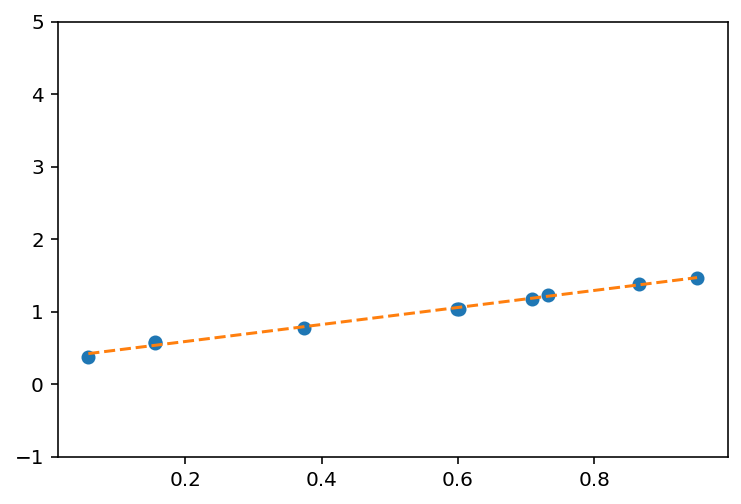

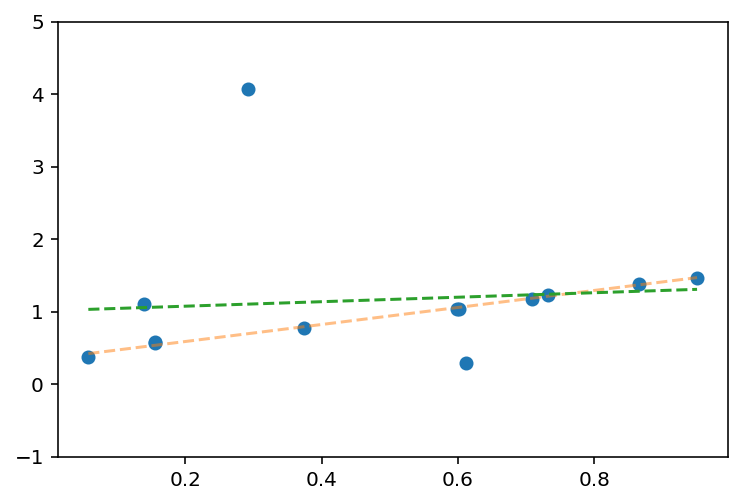

In [78]:
np.random.seed(42)
m=1.2; b=0.3
x = np.random.random(10)
x.sort()
y = m*x+b +np.random.random(len(x))*0.1
plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.plot(x,x*m+b,'--')
plt.ylim(-1,5)
plt.show()

x2 = np.random.random(3)
y2 = (3*np.random.random(3)-1)*3
x = np.append(x,x2)
xsort = np.argsort(x)
y=np.append(y,y2)
y=y[xsort]
x=x[xsort]
plt.plot(x,y,'o')
plt.plot(x,x*m+b,'--',alpha=0.5)
m2,b2 = np.polyfit(x,y,1)
plt.plot(x,x*m2+b2,'--')
plt.ylim(-1,5)
plt.show()

inliers= 8


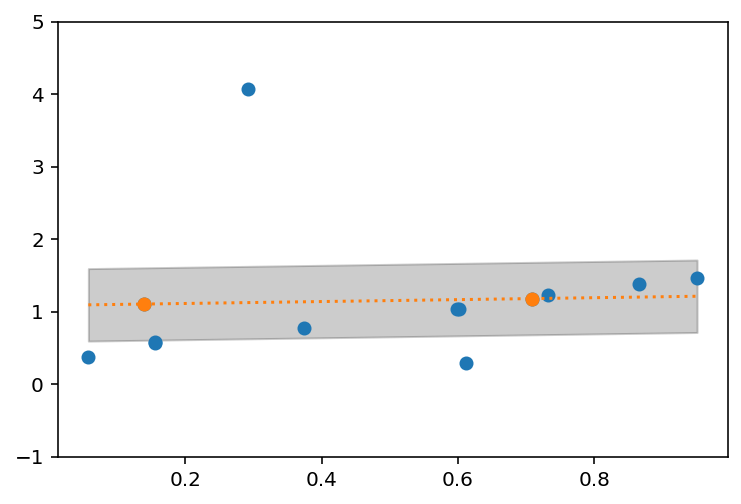

inliers= 10


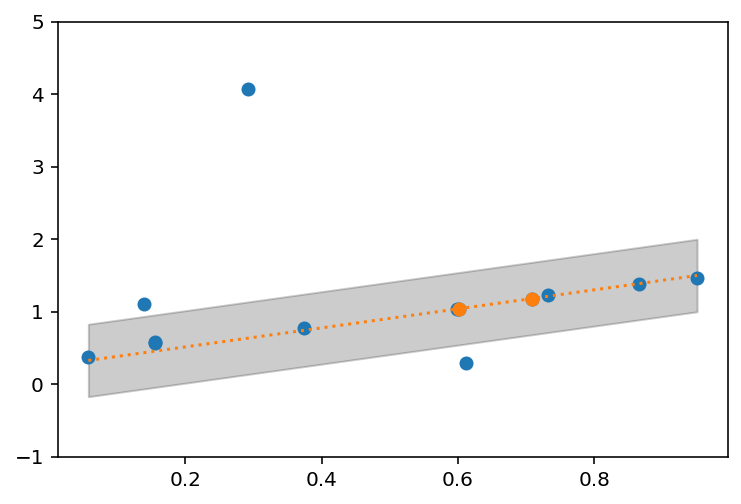

inliers= 10


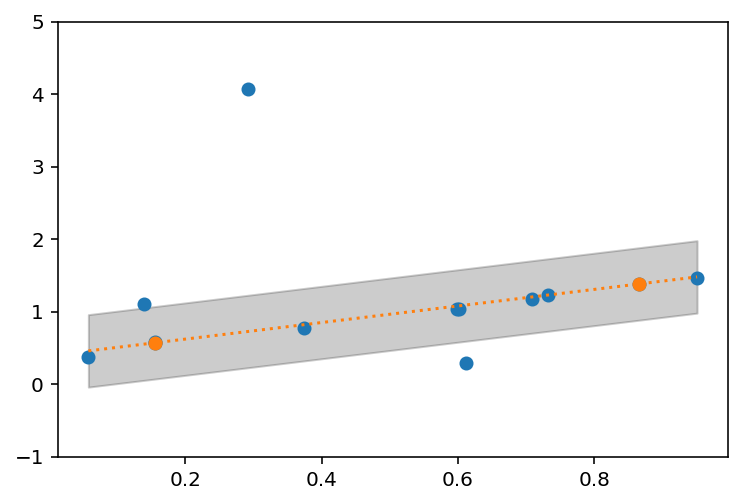

inliers= 10


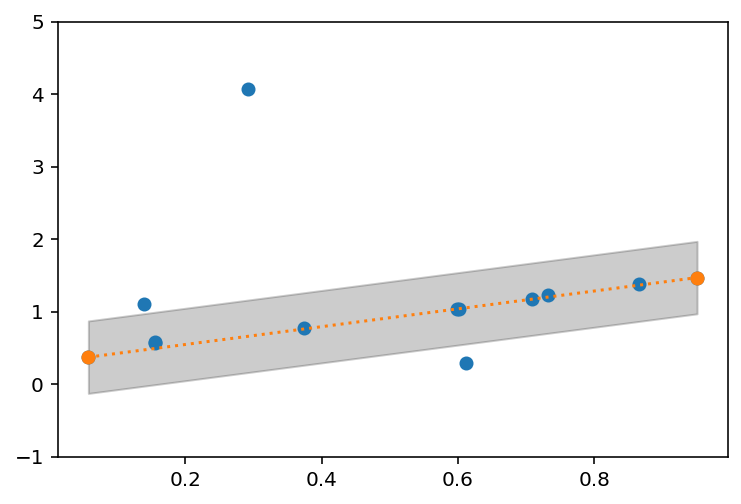

inliers= 3


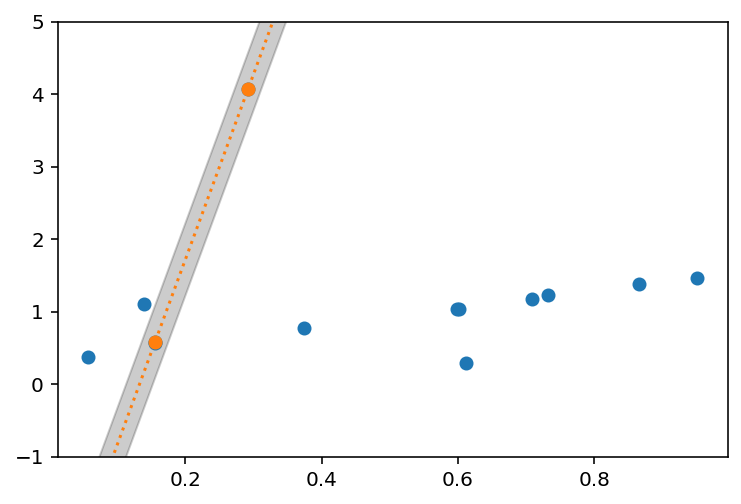

inliers= 3


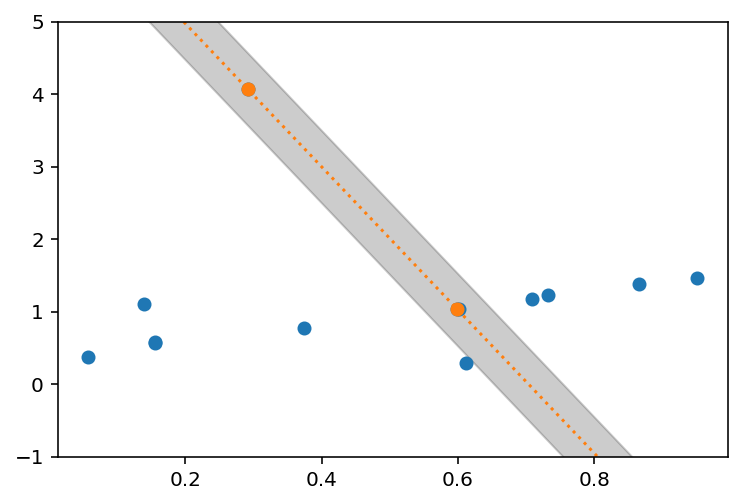

inliers= 2


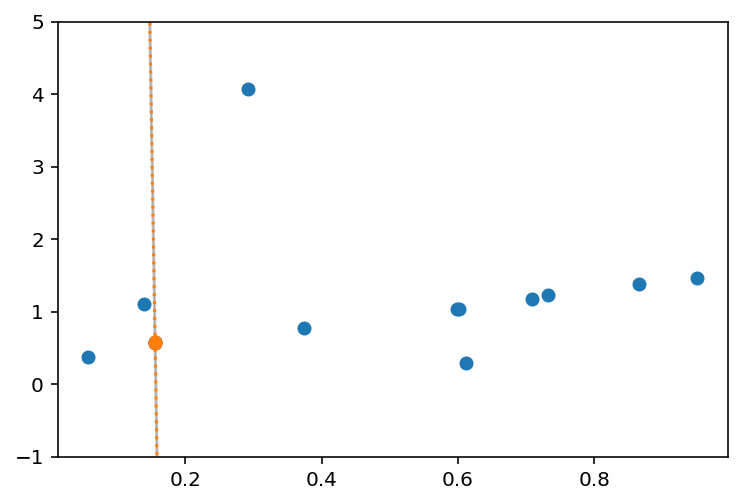

inliers= 10


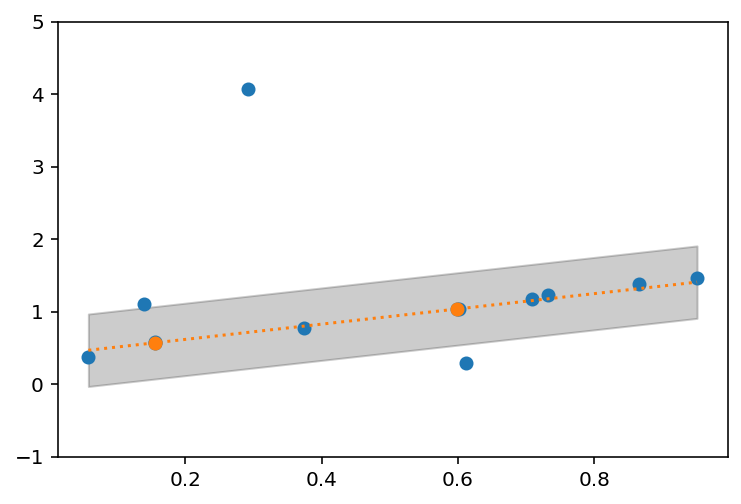

inliers= 3


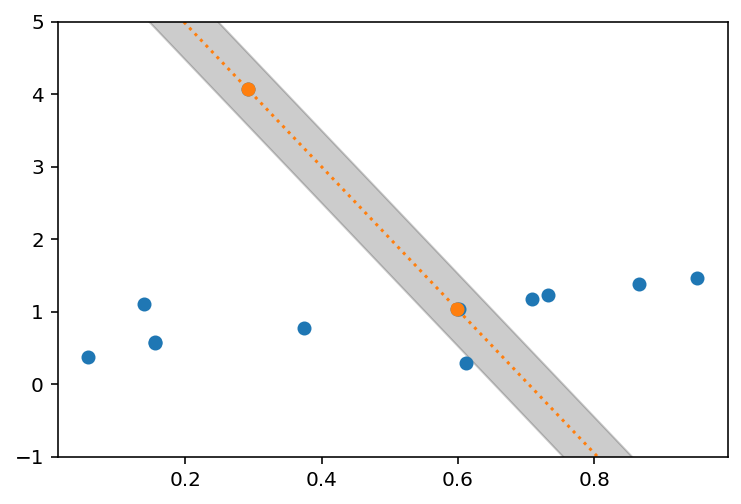

inliers= 8


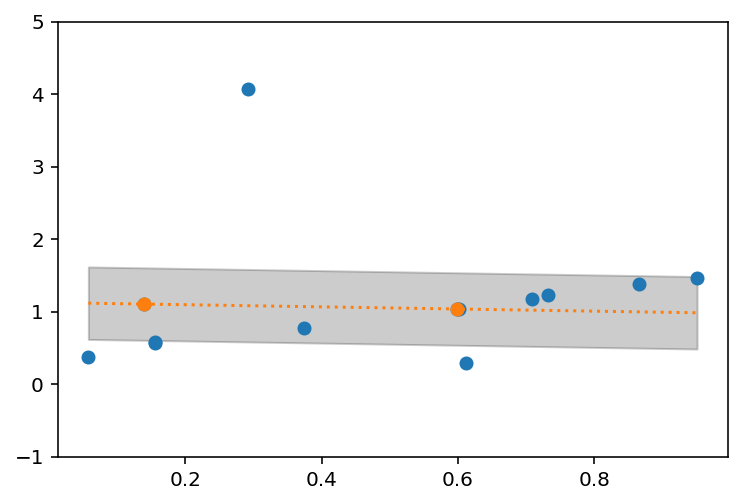

In [79]:
allPoints = np.arange(len(x))
xfit = np.linspace(min(x),max(x))
delta = 0.5
for i in range(10):
    np.random.shuffle(allPoints)
    points = allPoints[:2]
    xnew = x[points]
    ynew = y[points]
    mp,bp = np.polyfit(xnew,ynew,1)
    
    plt.plot(x,y,'o')
    plt.plot(xnew,ynew,f'oC{(1)%10}')
    plt.plot(xfit,xfit*mp+bp,f':C{(1)%10}')
    plt.fill_between(xfit, xfit*mp+bp-delta, xfit*mp+bp+delta,alpha=0.2,color='k')
    mask=((x*mp+bp+delta)>y)& (y>(x*mp+bp-delta))
    print("inliers=",np.sum((mask)))
    plt.ylim(-1,5)
    plt.show()

In [80]:
len(x)

13

# Linear Fits

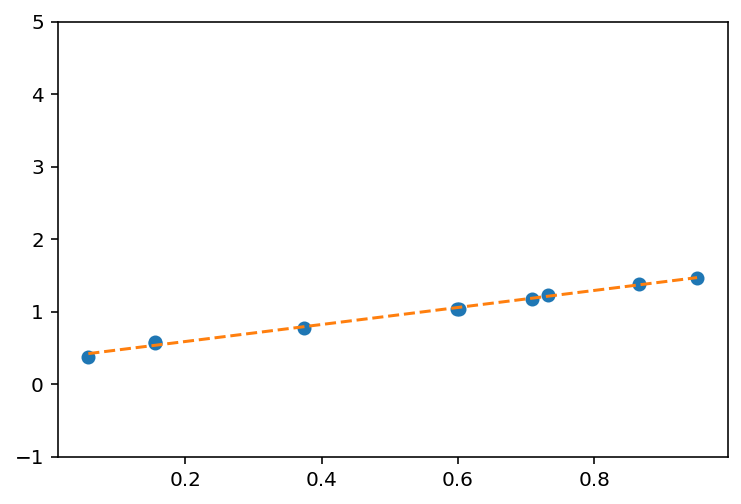

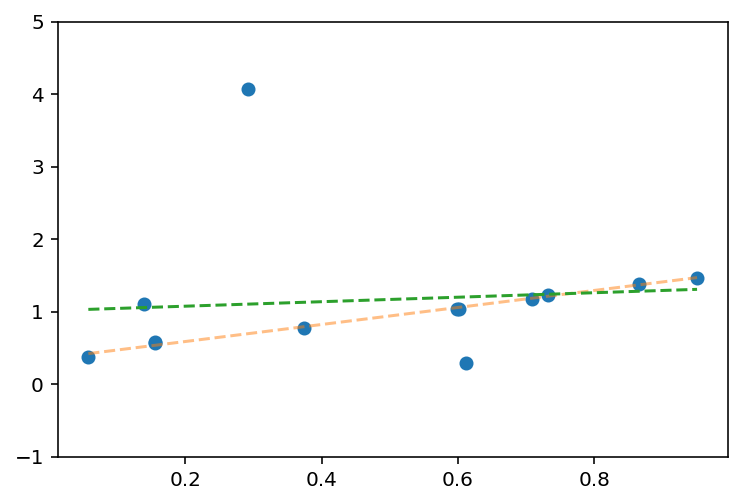

In [117]:
np.random.seed(42)
m=1.2; b=0.3
x = np.random.random(10)
x.sort()
y = m*x+b +np.random.random(len(x))*0.1
plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.plot(x,x*m+b,'--')
plt.ylim(-1,5)
plt.show()

x2 = np.random.random(3)
y2 = (3*np.random.random(3)-1)*3
x = np.append(x,x2)
xsort = np.argsort(x)
y=np.append(y,y2)
y=y[xsort]
x=x[xsort]
plt.plot(x,y,'o')
plt.plot(x,x*m+b,'--',alpha=0.5)
m2,b2 = np.polyfit(x,y,1)
plt.plot(x,x*m2+b2,'--')
plt.ylim(-1,5)
plt.show()

## Fixed Width

In [125]:
def RANSAC_linear(x,y,delta,nTrials):
    best_fit = -1
    mbest,bbest = -1,-1
    param_set = []
    allPoints = np.arange(len(x))
    for i in range(nTrials):
        # get new points
        np.random.shuffle(allPoints)
        points = allPoints[:2]
        xnew = x[points]
        ynew = y[points]
        # generate potential model
        mp,bp = np.polyfit(xnew,ynew,1)
        
        # calculate cost (inliers)
        mask=((x*mp+bp+delta)>y)& (y>(x*mp+bp-delta))
        inliers = np.sum(mask)
        if inliers > best_fit:
            best_fit,mbest,bbest = inliers,mp,bp
            param_set = []
        elif inliers == best_fit:
            param_set.append((mp,bp))
            
    return best_fit,mbest,bbest,param_set

In [126]:
delta = 0.5
best_fit,mbest,bbest,param_set = RANSAC_linear(x,y,delta,100)

In [127]:
print("Best # inliers:",best_fit)
print(f"True (m,b)={1.2,0.3} | guessed (m,b)={round(mbest,2),round(bbest,2)}")
print("other params found:",param_set)

Best # inliers: 11
True (m,b)=(1.2, 0.3) | guessed (m,b)=(1.03, 0.49)
other params found: [(1.0335475040063236, 0.4873716832986319)]


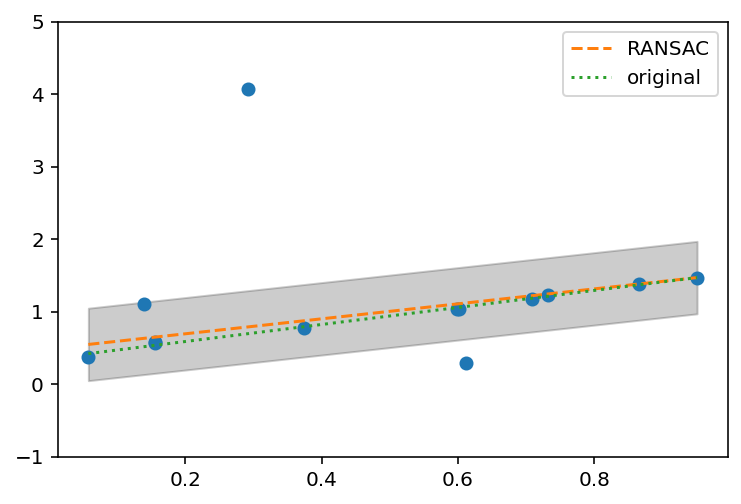

In [124]:

plt.plot(x,y,'o')
plt.plot(x,x*mbest+bbest,'--',label="RANSAC")
plt.plot(x,x*m+b,':',label='original')
# plt.plot(x,x*m2+b2,':',label='all points')
plt.fill_between(xfit, xfit*mbest+bbest-delta, xfit*mbest+bbest+delta,alpha=0.2,color='k')
plt.legend()
plt.ylim(-1,5)
plt.show()

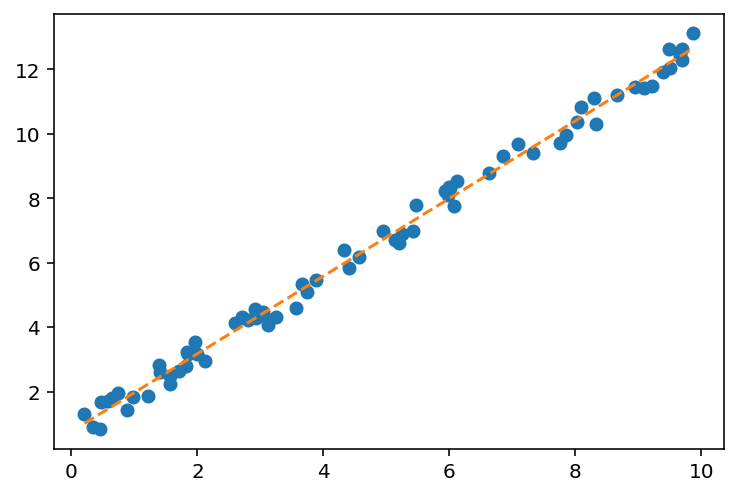

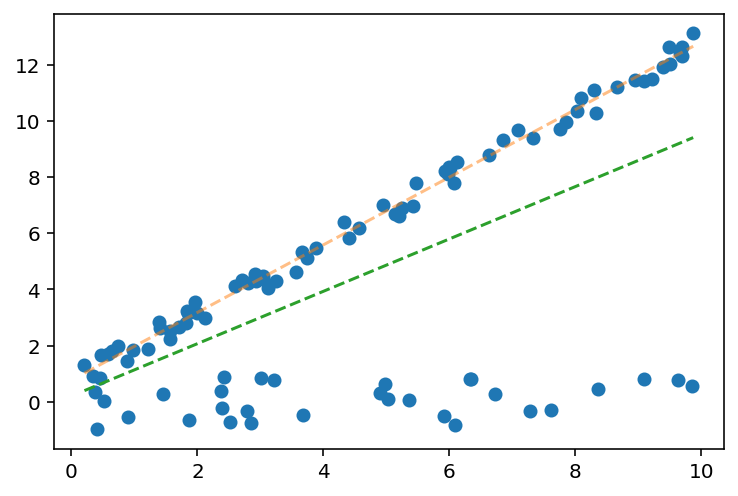

In [128]:
np.random.seed(42)
m=1.2; b=0.3
x = np.random.random(70)*10
x.sort()
y = m*x+b +np.random.random(len(x))*1
plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.plot(x,x*m+b,'--')
# plt.ylim(-1,5)
plt.show()

x2 = np.random.random(30)*10;x2.sort()
y2 = (2*np.random.random(30)-1)
x = np.append(x,x2)
xsort = np.argsort(x)
y=np.append(y,y2)
y=y[xsort]
x=x[xsort]
plt.plot(x,y,'o')
plt.plot(x,x*m+b,'--',alpha=0.5)
m2,b2 = np.polyfit(x,y,1)
plt.plot(x,x*m2+b2,'--')
# plt.ylim(-1,5)
plt.show()

In [129]:
delta = 0.5
best_fit,mbest,bbest,param_set = RANSAC_linear(x,y,delta,100)
print("Best # inliers:",best_fit)
print(f"True (m,b)={1.2,0.3} | guessed (m,b)={round(mbest,2),round(bbest,2)}")
print("other params found:",param_set)

Best # inliers: 66
True (m,b)=(1.2, 0.3) | guessed (m,b)=(1.19, 0.76)
other params found: []


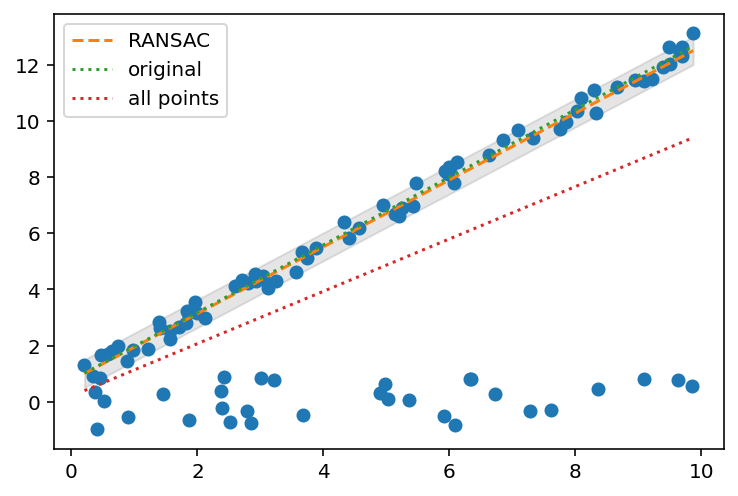

In [130]:
xfit = np.linspace(min(x),max(x))
plt.plot(x,y,'o')
plt.plot(x,x*mbest+bbest,'--',label="RANSAC")
plt.plot(x,x*m+b,':',label='original')
plt.plot(x,x*m2+b2,':',label='all points')
plt.fill_between(xfit, xfit*mbest+bbest-delta, xfit*mbest+bbest+delta,alpha=0.1,color='k')
plt.legend()

plt.show()

## Heavy Noise

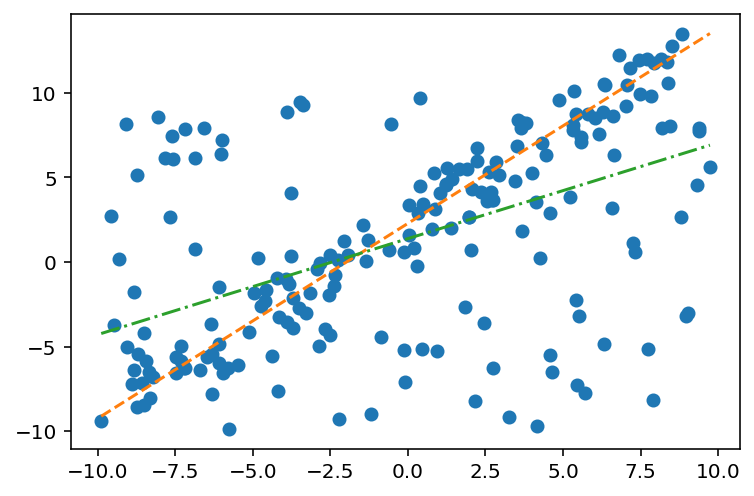

In [161]:
np.random.seed(42)
#start with uniform noise -10,10

x = 10*(2*np.random.random(100)-1); x.sort()
y = 10*(2*np.random.random(100)-1)

# now put a line in there
m=1.2; b=0.3
x2 = 9*(2*np.random.random(100)-1)
y2 =  m*x2+b+np.random.random(len(x2))*4

x = np.append(x,x2); 
xsort = np.argsort(x)
y=np.append(y,y2)
y=y[xsort]
x=x[xsort]

plt.plot(x,y,'o')

m,b = np.polyfit(x2,y2,1)
plt.plot(x,x*m+b,'--')

m2,b2 = np.polyfit(x,y,1)
plt.plot(x,x*m2+b2,'-.')

plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.6 ms
Best # inliers: 35
True (m,b)=(1.2, 0.3) | guessed (m,b)=(1.16, 3.07)
other params found: []


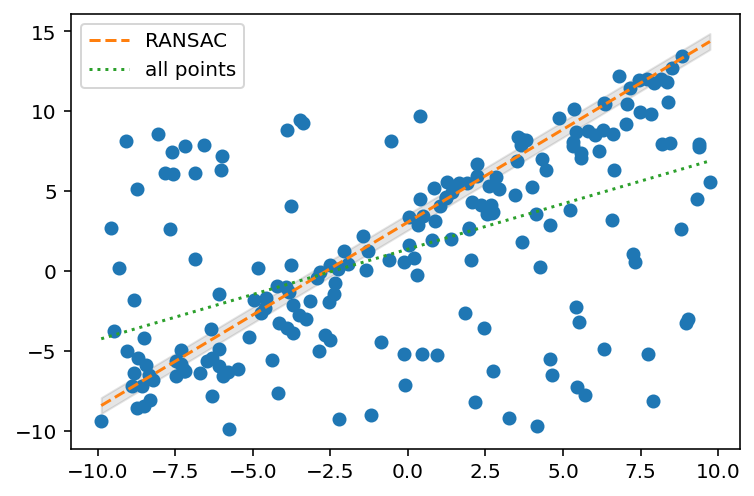

In [163]:
delta = 0.5
best_fit,mbest,bbest,param_set = RANSAC_linear(x,y,delta,100)
print("Best # inliers:",best_fit)
print(f"True (m,b)={1.2,0.3} | guessed (m,b)={round(mbest,2),round(bbest,2)}")
print("other params found:",param_set)


xfit = np.linspace(min(x),max(x))
plt.plot(x,y,'o')
plt.plot(x,x*mbest+bbest,'--',label="RANSAC")
# plt.plot(x,x*m+b,':',label='original')
plt.plot(x,x*m2+b2,':',label='all points')
plt.fill_between(xfit, xfit*mbest+bbest-delta, xfit*mbest+bbest+delta,alpha=0.1,color='k')
plt.legend()

plt.show()

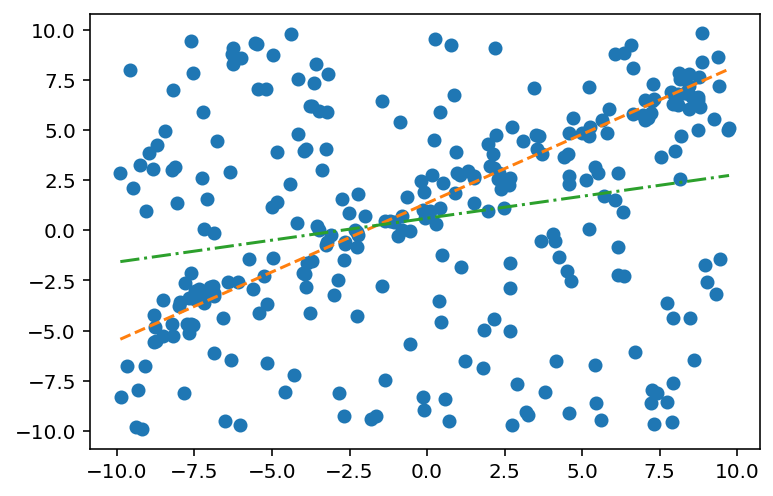

In [157]:
np.random.seed(42)
#start with uniform noise -10,10

x = 10*(2*np.random.random(200)-1); x.sort()
y = 10*(2*np.random.random(200)-1)

# now put a line in there
m=0.7; b=0.3
x2 = 9*(2*np.random.random(100)-1)
y2 =  m*x2+b+np.random.random(len(x2))*2

x = np.append(x,x2); 
xsort = np.argsort(x)
y=np.append(y,y2)
y=y[xsort]
x=x[xsort]

plt.plot(x,y,'o')

m,b = np.polyfit(x2,y2,1)
plt.plot(x,x*m+b,'--')

m2,b2 = np.polyfit(x,y,1)
plt.plot(x,x*m2+b2,'-.')

plt.show()

Best # inliers: 51
True (m,b)=(0.69, 1.35) | guessed (m,b)=(0.76, 1.34)
other params found: [(0.49760753491653326, 0.6278025506883778)]


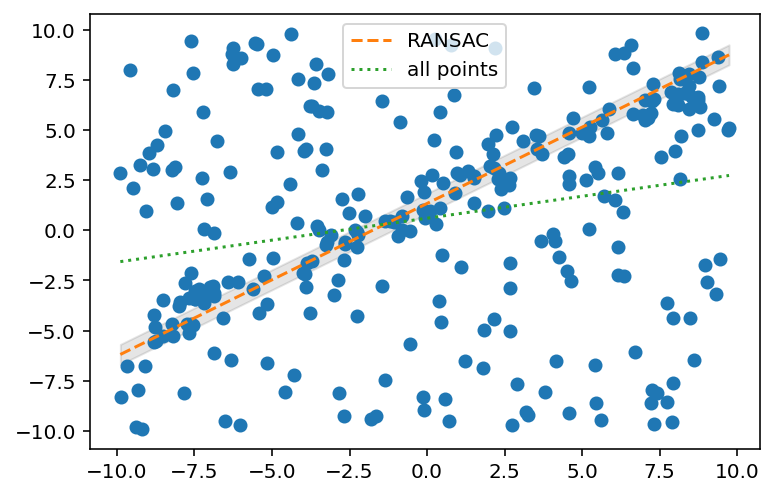

In [160]:
delta = 0.5
best_fit,mbest,bbest,param_set = RANSAC_linear(x,y,delta,100)
print("Best # inliers:",best_fit)
print(f"True (m,b)={round(m,2),round(b,2)} | guessed (m,b)={round(mbest,2),round(bbest,2)}")
print("other params found:",param_set)


xfit = np.linspace(min(x),max(x))
plt.plot(x,y,'o')
plt.plot(x,x*mbest+bbest,'--',label="RANSAC")
# plt.plot(x,x*m+b,':',label='original')
plt.plot(x,x*m2+b2,':',label='all points')
plt.fill_between(xfit, xfit*mbest+bbest-delta, xfit*mbest+bbest+delta,alpha=0.1,color='k')
plt.legend()

plt.show()